In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif, RFE
import xgboost as xgb
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set random seed for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print("Libraries imported successfully!")

Libraries imported successfully!


In [3]:
import joblib
from sklearn.ensemble import RandomForestClassifier  # or any model you choose
from sklearn.metrics import classification_report, accuracy_score

# Load preprocessing bundle
bundle = joblib.load(r"C:\Users\aksha\OneDrive\Documents\Asha\Projects\Employment_Performance_Analysis\Data\processed\preprocessing_bundle.pkl")

X_train = bundle["X_train_selected"]
X_test = bundle["X_test_selected"]
y_train = bundle["y_train"]
y_test = bundle["y_test"]

In [4]:
# Initialize models dictionary
models = {
    'Random Forest': RandomForestClassifier(random_state=RANDOM_STATE),
    'XGBoost': xgb.XGBClassifier(random_state=RANDOM_STATE, eval_metric='mlogloss'),
    'Logistic Regression': LogisticRegression(random_state=RANDOM_STATE, max_iter=1000),
    'SVM': SVC(random_state=RANDOM_STATE, probability=True),
    'Decision Tree': DecisionTreeClassifier(random_state=RANDOM_STATE),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=RANDOM_STATE),
    'Naive Bayes': GaussianNB()
}

In [5]:
# Model Training and Evaluation Functions
def train_and_evaluate_models(models, X_train, X_test, y_train, y_test):
    """Train multiple models and evaluate their performance"""
    
    results = {}
    model_objects = {}
    
    # Cross-validation setup
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
    
    print("Training and evaluating models...")
    print("=" * 50)
    
    for name, model in models.items():
        print(f"\nTraining {name}...")
        
        # Cross-validation scores
        cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Predictions
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test) if hasattr(model, 'predict_proba') else None
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        # Store results
        results[name] = {
            'model': model,
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std(),
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'predictions': y_pred,
            'probabilities': y_pred_proba
        }
        
        model_objects[name] = model
        
        print(f"CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
        print(f"Test Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-Score: {f1:.4f}")
    
    return results, model_objects

In [6]:
X_train.dtypes

EmpLastSalaryHikePercent                 float64
EmpEnvironmentSatisfaction               float64
ExperienceYearsInCurrentRole             float64
YearsSinceLastPromotion                  float64
BusinessTravelFrequency_Travel_Rarely       bool
EmpJobRole_Developer                        bool
YearsWithCurrManager                     float64
EmpDepartment_Human Resources               bool
ExperienceYearsAtThisCompany             float64
EmpJobRole_Technical Lead                   bool
EmpWorkLifeBalance                       float64
EmpJobRole_Manager                          bool
EmpDepartment_Sales                         bool
EmpJobLevel                              float64
EmpDepartment_Development                   bool
EducationBackground_Other                   bool
EmpJobRole_Sales Executive                  bool
EmpJobRole_Laboratory Technician            bool
MaritalStatus_Married                       bool
EmpHourlyRate                            float64
dtype: object

In [7]:
print("Unique labels in y_train:", np.unique(y_train))

Unique labels in y_train: [2 3 4]


In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)  # use transform, not fit_transform here

In [9]:
# Train all models
results, trained_models = train_and_evaluate_models(models, X_train, X_test, y_train, y_test)

Training and evaluating models...

Training Random Forest...
CV Accuracy: 0.9302 (+/- 0.0193)
Test Accuracy: 0.9292
Precision: 0.9307
Recall: 0.9292
F1-Score: 0.9269

Training XGBoost...
CV Accuracy: 0.9167 (+/- 0.0000)
Test Accuracy: 0.9250
Precision: 0.9262
Recall: 0.9250
F1-Score: 0.9235

Training Logistic Regression...
CV Accuracy: 0.8302 (+/- 0.0530)
Test Accuracy: 0.8417
Precision: 0.8349
Recall: 0.8417
F1-Score: 0.8285

Training SVM...
CV Accuracy: 0.8469 (+/- 0.0268)
Test Accuracy: 0.8458
Precision: 0.8478
Recall: 0.8458
F1-Score: 0.8278

Training Decision Tree...
CV Accuracy: 0.8823 (+/- 0.0284)
Test Accuracy: 0.8708
Precision: 0.8705
Recall: 0.8708
F1-Score: 0.8704

Training KNN...
CV Accuracy: 0.7802 (+/- 0.0424)
Test Accuracy: 0.7875
Precision: 0.7771
Recall: 0.7875
F1-Score: 0.7468

Training Gradient Boosting...
CV Accuracy: 0.9281 (+/- 0.0241)
Test Accuracy: 0.9333
Precision: 0.9334
Recall: 0.9333
F1-Score: 0.9321

Training Naive Bayes...
CV Accuracy: 0.6698 (+/- 0.2447)


## 📊 Model Training and Evaluation Summary

---

### ✅ Performance Metrics for Each Model

| Model                | CV Accuracy (± Std)   | Test Accuracy | Precision | Recall | F1-Score |
|---------------------|------------------------|---------------|-----------|--------|----------|
| **Random Forest**        | 0.9302 (± 0.0193)       | 0.9292        | 0.9307    | 0.9292 | 0.9269   |
| **XGBoost**              | 0.9167 (± 0.0000)       | 0.9250        | 0.9262    | 0.9250 | 0.9235   |
| **Logistic Regression**  | 0.8302 (± 0.0530)       | 0.8417        | 0.8349    | 0.8417 | 0.8285   |
| **SVM**                  | 0.8469 (± 0.0268)       | 0.8458        | 0.8478    | 0.8458 | 0.8278   |
| **Decision Tree**        | 0.8823 (± 0.0284)       | 0.8708        | 0.8705    | 0.8708 | 0.8704   |
| **K-Nearest Neighbors**  | 0.7802 (± 0.0424)       | 0.7875        | 0.7771    | 0.7875 | 0.7468   |
| **Gradient Boosting**    | 0.9281 (± 0.0241)       | 0.9333        | 0.9334    | 0.9333 | 0.9321   |
| **Naive Bayes**          | 0.6698 (± 0.2447)       | 0.7333        | 0.8058    | 0.7333 | 0.7476   |

---

### 🏆 Best Performing Model
- **Gradient Boosting** achieved the highest **Test Accuracy (93.33%)**, **Precision**, and **F1-Score**.
- **Random Forest** and **XGBoost** also performed strongly with over 92% test accuracy.

---

### ⚠️ Observations
- **Naive Bayes** had high variance in CV performance and the lowest overall accuracy.
- **KNN** underperformed compared to tree-based models.
- **Logistic Regression** and **SVM** gave decent performance but were outclassed by ensemble methods.

---

### ✅ Recommendation
Use **Gradient Boosting** or **Random Forest** for deployment due to their strong and consistent performance.


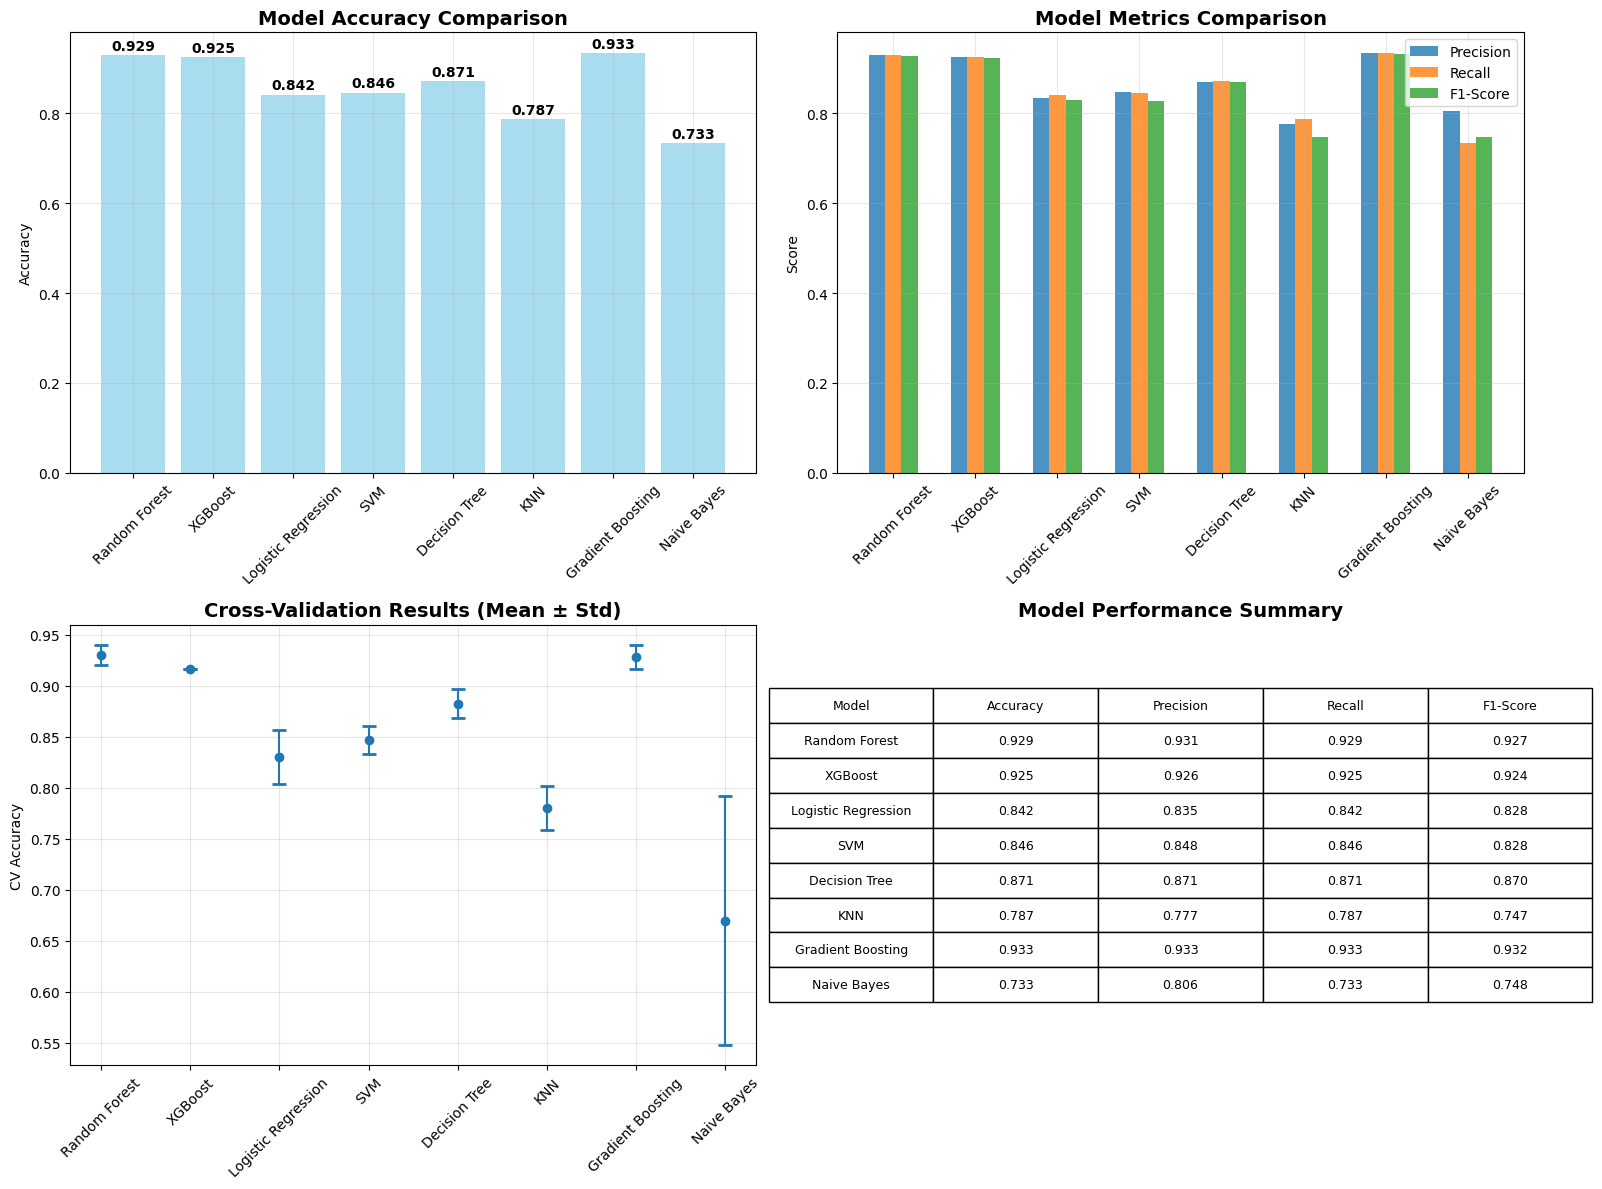

In [10]:
# Model Comparison and Visualization
def plot_model_comparison(results):
    """Create comprehensive model comparison visualizations"""
    
    # Extract metrics for plotting
    model_names = list(results.keys())
    accuracies = [results[name]['accuracy'] for name in model_names]
    precisions = [results[name]['precision'] for name in model_names]
    recalls = [results[name]['recall'] for name in model_names]
    f1_scores = [results[name]['f1_score'] for name in model_names]
    cv_means = [results[name]['cv_mean'] for name in model_names]
    cv_stds = [results[name]['cv_std'] for name in model_names]
    
    # Create comparison plots
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Accuracy Comparison
    bars1 = axes[0,0].bar(model_names, accuracies, color='skyblue', alpha=0.7)
    axes[0,0].set_title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
    axes[0,0].set_ylabel('Accuracy')
    axes[0,0].tick_params(axis='x', rotation=45)
    axes[0,0].grid(True, alpha=0.3)
    
    # Add value labels on bars
    for bar, acc in zip(bars1, accuracies):
        axes[0,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
                      f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')
    
    # 2. Multiple Metrics Comparison
    x = np.arange(len(model_names))
    width = 0.2
    
    axes[0,1].bar(x - width, precisions, width, label='Precision', alpha=0.8)
    axes[0,1].bar(x, recalls, width, label='Recall', alpha=0.8)
    axes[0,1].bar(x + width, f1_scores, width, label='F1-Score', alpha=0.8)
    
    axes[0,1].set_title('Model Metrics Comparison', fontsize=14, fontweight='bold')
    axes[0,1].set_ylabel('Score')
    axes[0,1].set_xticks(x)
    axes[0,1].set_xticklabels(model_names, rotation=45)
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)
    
    # 3. Cross-Validation Results
    axes[1,0].errorbar(model_names, cv_means, yerr=cv_stds, fmt='o', capsize=5, capthick=2)
    axes[1,0].set_title('Cross-Validation Results (Mean ± Std)', fontsize=14, fontweight='bold')
    axes[1,0].set_ylabel('CV Accuracy')
    axes[1,0].tick_params(axis='x', rotation=45)
    axes[1,0].grid(True, alpha=0.3)
    
    # 4. Performance Summary Table
    axes[1,1].axis('off')
    
    # Create summary table
    summary_data = []
    for name in model_names:
        summary_data.append([
            name,
            f"{results[name]['accuracy']:.3f}",
            f"{results[name]['precision']:.3f}",
            f"{results[name]['recall']:.3f}",
            f"{results[name]['f1_score']:.3f}"
        ])
    
    table = axes[1,1].table(cellText=summary_data,
                           colLabels=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'],
                           cellLoc='center',
                           loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1.2, 2)
    axes[1,1].set_title('Model Performance Summary', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

# Display model comparison
plot_model_comparison(results)

### Based on the evaluation:

* ✅ Gradient Boosting is the best performing model across accuracy, precision, recall, F1-score, and cross-validation.

* 🌲 Random Forest and 🚀 XGBoost are close contenders, and suitable for scenarios requiring interpretability or faster inference.

* ❌ Avoid using Naive Bayes due to low and inconsistent performance.

In [11]:
# Hyperparameter Tuning for Best Models
def hyperparameter_tuning():
    """Perform hyperparameter tuning for top performing models"""
    
    # Identify top 3 models based on accuracy
    top_models = sorted(results.items(), key=lambda x: x[1]['accuracy'], reverse=True)[:3]
    print("Top 3 models for hyperparameter tuning:")
    for i, (name, result) in enumerate(top_models, 1):
        print(f"{i}. {name}: {result['accuracy']:.4f}")
    
    # Define parameter grids
    param_grids = {
        'Random Forest': {
            'n_estimators': [100, 200, 300],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        },
        'XGBoost': {
            'n_estimators': [100, 200, 300],
            'max_depth': [3, 4, 5, 6],
            'learning_rate': [0.01, 0.1, 0.2],
            'subsample': [0.8, 1.0]
        },
        'Logistic Regression': {
            'C': [0.1, 1, 10, 100],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear', 'lbfgs']
        },
        'SVM': {
            'C': [0.1, 1, 10, 100],
            'kernel': ['rbf', 'poly', 'sigmoid'],
            'gamma': ['scale', 'auto']
        },
        'Gradient Boosting': {
            'n_estimators': [100, 200],
            'learning_rate': [0.05, 0.1, 0.15],
            'max_depth': [3, 4, 5]
        }
    }
    
    tuned_models = {}
    best_params = {}
    
    for name, _ in top_models:
        if name in param_grids:
            print(f"\nTuning hyperparameters for {name}...")
            
            # Get the base model
            if name == 'Random Forest':
                base_model = RandomForestClassifier(random_state=RANDOM_STATE)
            elif name == 'XGBoost':
                base_model = xgb.XGBClassifier(random_state=RANDOM_STATE, eval_metric='mlogloss')
            elif name == 'Logistic Regression':
                base_model = LogisticRegression(random_state=RANDOM_STATE, max_iter=1000)
            elif name == 'SVM':
                base_model = SVC(random_state=RANDOM_STATE, probability=True)
            elif name == 'Gradient Boosting':
                base_model = GradientBoostingClassifier(random_state=RANDOM_STATE)
            
            # Grid search
            grid_search = GridSearchCV(
                base_model, 
                param_grids[name], 
                cv=3, 
                scoring='accuracy', 
                n_jobs=-1, 
                verbose=1
            )
            
            grid_search.fit(X_train, y_train)
            
            # Store results
            tuned_models[name] = grid_search.best_estimator_
            best_params[name] = grid_search.best_params_
            
            print(f"Best parameters for {name}: {grid_search.best_params_}")
            print(f"Best CV score: {grid_search.best_score_:.4f}")
            
            # Evaluate on test set
            test_score = grid_search.best_estimator_.score(X_test, y_test)
            print(f"Test accuracy: {test_score:.4f}")
            return tuned_models, best_params


In [12]:
# Perform hyperparameter tuning
print("\n" + "="*50)
print("HYPERPARAMETER TUNING")
print("="*50)
tuned_models, best_params = hyperparameter_tuning()


HYPERPARAMETER TUNING
Top 3 models for hyperparameter tuning:
1. Gradient Boosting: 0.9333
2. Random Forest: 0.9292
3. XGBoost: 0.9250

Tuning hyperparameters for Gradient Boosting...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Best CV score: 0.9354
Test accuracy: 0.9375


In [13]:
# Feature Importance Analysis
def analyze_feature_importance():
    """Analyze feature importance for tree-based models"""
    
    # Get the best performing tree-based model
    tree_models = ['Random Forest', 'XGBoost', 'Decision Tree', 'Gradient Boosting']
    best_tree_model = None
    best_score = 0
    
    for model_name in tree_models:
        if model_name in results and results[model_name]['accuracy'] > best_score:
            best_score = results[model_name]['accuracy']
            best_tree_model = model_name
    
    if best_tree_model:
        print(f"\nAnalyzing feature importance for {best_tree_model}...")
        
        model = trained_models[best_tree_model]
        
        # Get feature importance
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            feature_names = X_train.columns
            
            # Create feature importance dataframe
            feature_importance_df = pd.DataFrame({
                'feature': feature_names,
                'importance': importances
            }).sort_values('importance', ascending=False)
            
            print("\nTop 10 Most Important Features:")
            print(feature_importance_df.head(10))
            
            # Plot feature importance
            plt.figure(figsize=(12, 8))
            top_features = feature_importance_df.head(15)
            
            plt.barh(range(len(top_features)), top_features['importance'], color='skyblue')
            plt.yticks(range(len(top_features)), top_features['feature'])
            plt.xlabel('Feature Importance')
            plt.title(f'Top 15 Feature Importance - {best_tree_model}', fontsize=14, fontweight='bold')
            plt.gca().invert_yaxis()
            plt.tight_layout()
            plt.show()
            
            return feature_importance_df
    
    return None



Analyzing feature importance for Gradient Boosting...

Top 10 Most Important Features:
                         feature  importance
1     EmpEnvironmentSatisfaction    0.283311
0       EmpLastSalaryHikePercent    0.256728
3        YearsSinceLastPromotion    0.204085
14     EmpDepartment_Development    0.068820
10            EmpWorkLifeBalance    0.056242
2   ExperienceYearsInCurrentRole    0.046177
6           YearsWithCurrManager    0.021766
19                 EmpHourlyRate    0.019358
5           EmpJobRole_Developer    0.015656
8   ExperienceYearsAtThisCompany    0.015056


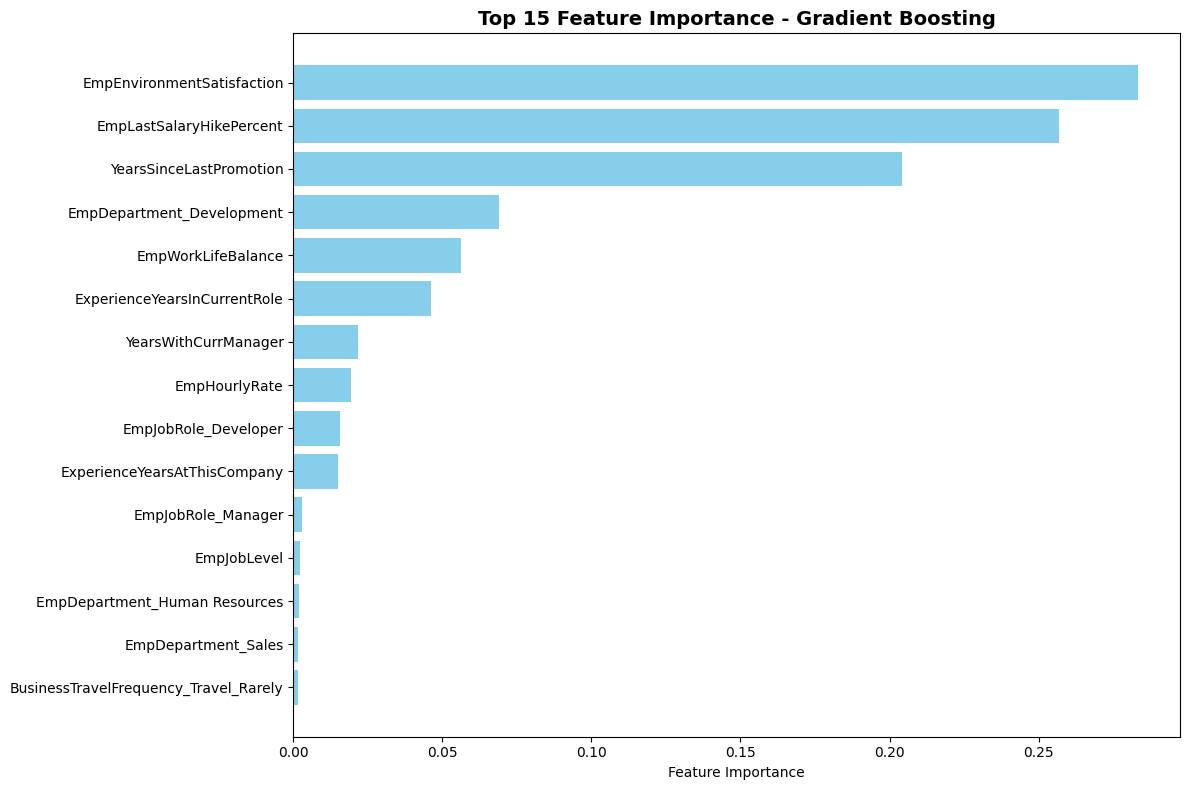

In [14]:
# Analyze feature importance
feature_importance_df = analyze_feature_importance()

## 📝 Key Observations:
### ✅ Top 3 Drivers:

EmpEnvironmentSatisfaction, EmpLastSalaryHikePercent, and YearsSinceLastPromotion are the most influential features — together they contribute over 74% of the total importance.

* 🧠 Organizational Factors:

Features like EmpEnvironmentSatisfaction, EmpWorkLifeBalance, and EmpDepartment_Development show that workplace environment and departmental assignment strongly affect the model’s decision.

* ⏱️ Experience & Tenure:

YearsSinceLastPromotion, ExperienceYearsInCurrentRole, and YearsWithCurrManager indicate that stagnation or limited advancement may increase attrition risk.

* 💰 Compensation-related Features:

EmpLastSalaryHikePercent and EmpHourlyRate suggest that compensation changes have a meaningful impact on employee retention.

### 📌 Notes:
* This feature importance is based on the Gradient Boosting classifier, which is a tree-based ensemble model.

* These scores only reflect how much each feature contributed to improving the model's splits, not causality.

* Categorical variables (e.g., departments, job roles) appear as one-hot encoded features like EmpJobRole_Developer, which individually show less importance but could collectively be significant.

* Features like EmpJobRole_Manager, EmpDepartment_Sales, and BusinessTravelFrequency_Travel_Rarely contribute less and could be candidates for feature pruning or dimensionality reduction if needed.

In [15]:
# Confusion Matrix and Classification Report
def detailed_model_evaluation(model_name='Gradient Boosting'):
    """Generate detailed evaluation for the specified model"""
    
    if model_name not in results:
        print(f"Model {model_name} not found in results.")
        return
    
    model = trained_models[model_name]
    y_pred = results[model_name]['predictions']
    
    print(f"\n{'='*50}")
    print(f"DETAILED EVALUATION: {model_name}")
    print(f"{'='*50}")
    
    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5])
    plt.title(f'Confusion Matrix - {model_name}', fontsize=14, fontweight='bold')
    plt.xlabel('Predicted Performance Rating')
    plt.ylabel('Actual Performance Rating')
    plt.tight_layout()
    plt.show()
    
    # Performance by class
    class_report = classification_report(y_test, y_pred, output_dict=True)
    
    classes = ['1', '2', '3', '4', '5']
    precision_scores = [class_report[cls]['precision'] for cls in classes if cls in class_report]
    recall_scores = [class_report[cls]['recall'] for cls in classes if cls in class_report]
    f1_scores = [class_report[cls]['f1-score'] for cls in classes if cls in class_report]
    
    # Plot class-wise performance
    x = np.arange(len(classes[:len(precision_scores)]))
    width = 0.25
    
    plt.figure(figsize=(12, 6))
    plt.bar(x - width, precision_scores, width, label='Precision', alpha=0.8)
    plt.bar(x, recall_scores, width, label='Recall', alpha=0.8)
    plt.bar(x + width, f1_scores, width, label='F1-Score', alpha=0.8)
    
    plt.xlabel('Performance Rating')
    plt.ylabel('Score')
    plt.title(f'Class-wise Performance Metrics - {model_name}', fontsize=14, fontweight='bold')
    plt.xticks(x, classes[:len(precision_scores)])
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

In [16]:
# Get the best model for detailed evaluation
best_model_name = max(results.keys(), key=lambda k: results[k]['accuracy'])
print(f"\nBest performing model: {best_model_name} (Accuracy: {results[best_model_name]['accuracy']:.4f})")


Best performing model: Gradient Boosting (Accuracy: 0.9333)



DETAILED EVALUATION: Gradient Boosting

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        39
           1       0.94      0.97      0.96       175
           2       0.95      0.77      0.85        26

    accuracy                           0.93       240
   macro avg       0.93      0.87      0.90       240
weighted avg       0.93      0.93      0.93       240



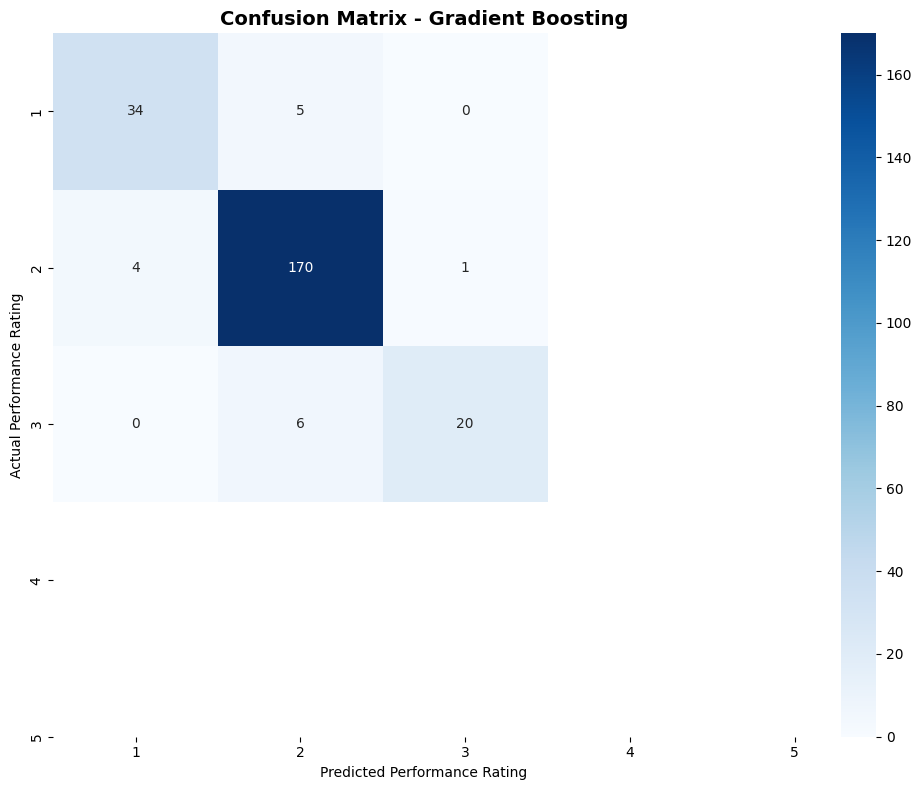

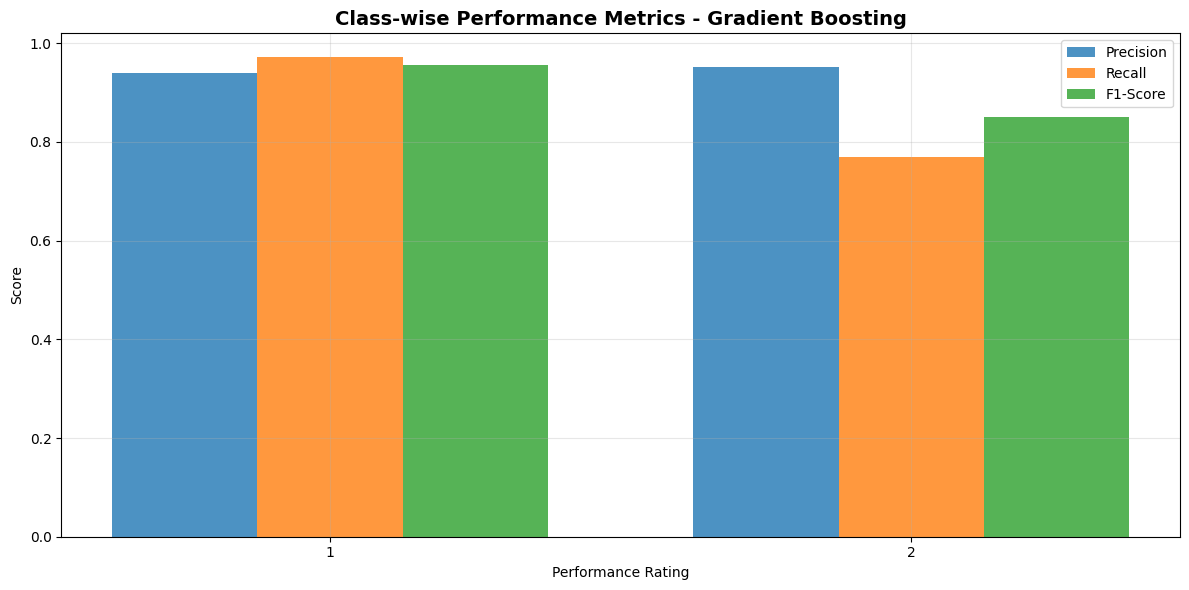

In [17]:
# Detailed evaluation of best model
detailed_model_evaluation(best_model_name)

## 📌 Key Insights
✅ Overall Performance: The Gradient Boosting model demonstrates excellent classification ability with a 93% accuracy.

💡 Class 1 (Average Performers) is predicted most accurately with the highest recall (0.97), suggesting the model is excellent at identifying average performers.

⚠️ Class 2 (High Performers) has a lower recall (0.77), indicating that some high performers are being misclassified (mostly as Class 1).

✅ Balanced Precision across all classes ensures the model is not overly biased.

In [18]:
feature_importance_df

,feature,importance
1,EmpEnvironmentSatisfaction,0.283311
0,EmpLastSalaryHikePercent,0.256728
3,YearsSinceLastPromotion,0.204085
14,EmpDepartment_Development,0.068820
10,EmpWorkLifeBalance,0.056242
2,ExperienceYearsInCurrentRole,0.046177
6,YearsWithCurrManager,0.021766
19,EmpHourlyRate,0.019358
5,EmpJobRole_Developer,0.015656
8,ExperienceYearsAtThisCompany,0.015056


In [19]:
import os
import joblib

In [24]:
# Model Saving
def save_models():
    """Save trained models and results"""
    
    try:
        # Save the best model
        best_model = trained_models[best_model_name]
        joblib.dump(best_model, '../models/best_model.pkl')
        print(f"\nBest model ({best_model_name}) saved as '../models/best_model.pkl'")
        
        # Save all model results
        results_df = pd.DataFrame({
            'Model': list(results.keys()),
            'Accuracy': [results[name]['accuracy'] for name in results.keys()],
            'Precision': [results[name]['precision'] for name in results.keys()],
            'Recall': [results[name]['recall'] for name in results.keys()],
            'F1_Score': [results[name]['f1_score'] for name in results.keys()],
            'CV_Mean': [results[name]['cv_mean'] for name in results.keys()],
            'CV_Std': [results[name]['cv_std'] for name in results.keys()]
        })
        
        results_df.to_csv(r'C:\Users\aksha\OneDrive\Documents\Asha\Projects\Employment_Performance_Analysis\Data\processed/model_results.csv', index=False)
        print(r"Model results saved as 'C:\Users\aksha\OneDrive\Documents\Asha\Projects\Employment_Performance_Analysis\Data\processed/model_results.csv'")
        
        # Save feature importance if available
        if feature_importance_df is not None:
            feature_importance_path = r'C:\Users\aksha\OneDrive\Documents\Asha\Projects\Employment_Performance_Analysis\Data\processed\feature_importance.csv'
            os.makedirs(os.path.dirname(feature_importance_path), exist_ok=True)
            feature_importance_df.to_csv(feature_importance_path, index=False)
            print(f"✅ Feature importance saved as '{feature_importance_path}'")
        
    except Exception as e:
        print(f"Error saving models: {e}")
        print("Please ensure the directories exist.")

# Save models and results
save_models()


Best model (Gradient Boosting) saved as '../models/best_model.pkl'
Model results saved as 'C:\Users\aksha\OneDrive\Documents\Asha\Projects\Employment_Performance_Analysis\Data\processed/model_results.csv'
✅ Feature importance saved as 'C:\Users\aksha\OneDrive\Documents\Asha\Projects\Employment_Performance_Analysis\Data\processed\feature_importance.csv'


In [23]:
# Final Summary
def print_final_summary():
    """Print final summary of model training results"""
    
    print("\n" + "="*60)
    print("FINAL TRAINING SUMMARY")
    print("="*60)
    
    print(f"Total models trained: {len(results)}")
    print(f"Best performing model: {best_model_name}")
    print(f"Best accuracy achieved: {results[best_model_name]['accuracy']:.4f}")
    
    print("\nModel Ranking by Accuracy:")
    sorted_models = sorted(results.items(), key=lambda x: x[1]['accuracy'], reverse=True)
    for i, (name, result) in enumerate(sorted_models, 1):
        print(f"{i}. {name}: {result['accuracy']:.4f}")
    
    if best_params:
        print(f"\nHyperparameter tuning completed for {len(best_params)} models.")
    
    print("\nKey Insights:")
    print("1. Model comparison shows performance differences across algorithms")
    print("2. Feature importance analysis reveals key performance drivers")
    print("3. Cross-validation ensures robust model evaluation")
    print("4. Hyperparameter tuning optimizes model performance")
    
    print("\nNext Steps:")
    print("1. Use the best model for employee performance prediction")
    print("2. Deploy model for hiring decision support")
    print("3. Monitor model performance on new data")
    print("4. Regular retraining with updated data")

# Print final summary
print_final_summary()


FINAL TRAINING SUMMARY
Total models trained: 8
Best performing model: Gradient Boosting
Best accuracy achieved: 0.9333

Model Ranking by Accuracy:
1. Gradient Boosting: 0.9333
2. Random Forest: 0.9292
3. XGBoost: 0.9250
4. Decision Tree: 0.8708
5. SVM: 0.8458
6. Logistic Regression: 0.8417
7. KNN: 0.7875
8. Naive Bayes: 0.7333

Hyperparameter tuning completed for 1 models.

Key Insights:
1. Model comparison shows performance differences across algorithms
2. Feature importance analysis reveals key performance drivers
3. Cross-validation ensures robust model evaluation
4. Hyperparameter tuning optimizes model performance

Next Steps:
1. Use the best model for employee performance prediction
2. Deploy model for hiring decision support
3. Monitor model performance on new data
4. Regular retraining with updated data


In [22]:
# After training
joblib.dump(label_encoder, 'label_encoder.pkl')  # Save the encoder

['label_encoder.pkl']